/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22870 (\N{CJK UNIFIED IDEOGRAPH-5956}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29260 (\N{CJK UNIFIED IDEOGRAPH-724C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.

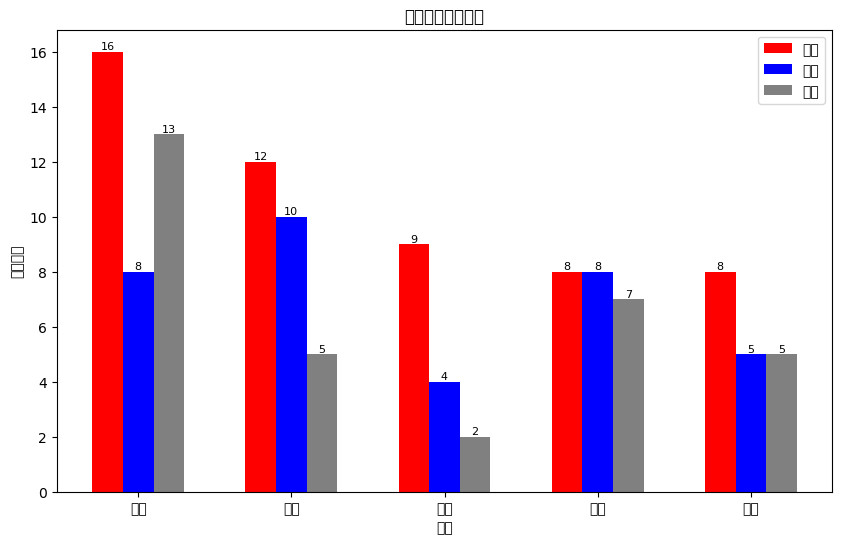

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 国家
countries = ['挪威', '德国', '中国', '美国', '瑞士']
# 金牌个数
gold_medal = np.array([16, 12, 9, 8, 8])
# 银牌个数
silver_medal = np.array([8, 10, 4, 8, 5])
# 铜牌个数
bronze_medal = np.array([13, 5, 2, 7, 5])

x = np.arange(len(countries))  # 创建x轴的数值序列

# 设置图形的大小
plt.figure(figsize=(10, 6))

# 绘制柱状图
plt.bar(x - 0.2, gold_medal, width=0.2, color='gold', label='金牌')
plt.bar(x, silver_medal, width=0.2, color='gry', label='银牌')
plt.bar(x + 0.2, bronze_medal, width=0.2, color='grey', label='铜牌')

# 设置x轴的刻度标签
plt.xticks(x, countries)

# 添加文本标签
for i in x:
    # 金牌
    plt.text(x[i] - 0.2, gold_medal[i], gold_medal[i], va='bottom', ha='center', fontsize=8)
    # 银牌
    plt.text(x[i], silver_medal[i], silver_medal[i], va='bottom', ha='center', fontsize=8)
    # 铜牌
    plt.text(x[i] + 0.2, bronze_medal[i], bronze_medal[i], va='bottom', ha='center', fontsize=8)

# 添加标题和坐标轴标签
plt.title('各国奖牌数量对比')
plt.xlabel('国家')
plt.ylabel('奖牌数量')

# 添加图例
plt.legend()

# 显示图形
plt.show()